In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Quadratic Data')

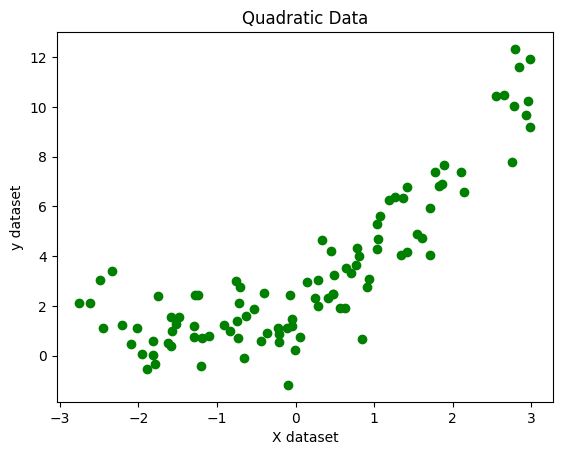

In [3]:
X = 6* np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

# quadratic equation used y = 0.5 * x^2 + 1.5x + 2 + outlier
plt.scatter(X, y, color="g")
plt.xlabel("X dataset")
plt.ylabel("y dataset")
plt.title("Quadratic Data")

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
## Lets implement simple linear regression model
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_1.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print("R2 Score:", score)

# curretly the score is 60% which is not good, because we are using linear regression on quadratic data


R2 Score: 0.6066766933729304


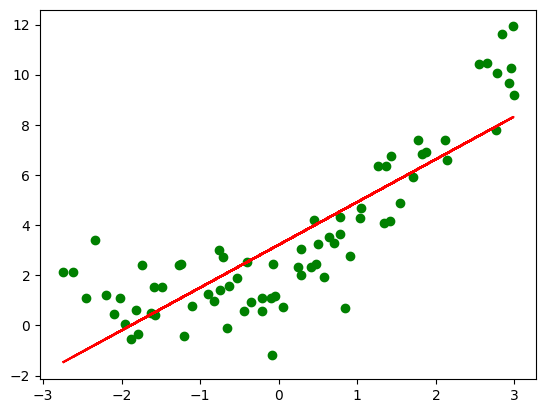

In [8]:
# lets visualize the model

plt.plot(X_train, regression_1.predict(X_train), color="r", label="Linear Regression")
plt.scatter(X_train, y_train, color="g", label="Train Data")

In [15]:
# now Lets use polynomial Transfermation

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
X_train_poly

array([[ 1.00000000e+00, -2.45420413e+00,  6.02311789e+00,
        -1.47819608e+01],
       [ 1.00000000e+00,  7.04234630e-01,  4.95946414e-01,
         3.49262640e-01],
       [ 1.00000000e+00,  1.03009446e+00,  1.06109460e+00,
         1.09302767e+00],
       [ 1.00000000e+00, -1.24605225e+00,  1.55264622e+00,
        -1.93467832e+00],
       [ 1.00000000e+00, -7.62514002e-01,  5.81427604e-01,
        -4.43346689e-01],
       [ 1.00000000e+00,  2.98251701e+00,  8.89540773e+00,
         2.65307049e+01],
       [ 1.00000000e+00, -2.01815854e+00,  4.07296388e+00,
        -8.21988682e+00],
       [ 1.00000000e+00, -3.59635174e-01,  1.29337459e-01,
        -4.65142994e-02],
       [ 1.00000000e+00, -7.13422917e-01,  5.08972259e-01,
        -3.63112474e-01],
       [ 1.00000000e+00, -2.62115040e+00,  6.87042941e+00,
        -1.80084288e+01],
       [ 1.00000000e+00, -1.58148484e+00,  2.50109429e+00,
        -3.95544270e+00],
       [ 1.00000000e+00,  4.76144231e-01,  2.26713329e-01,
      

In [18]:
regression_2 = LinearRegression()
regression_2.fit(X_train_poly, y_train)
y_pred = regression_2.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print("R2 Score:", score)

R2 Score: 0.8241285211712612


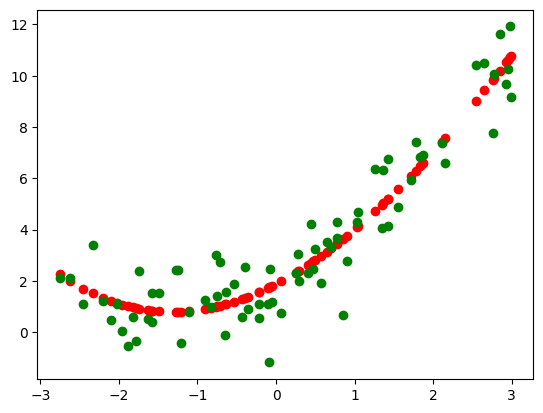

In [19]:
plt.scatter(X_train, regression_2.predict(X_train_poly), color="r", label="Polynomial Regression")
plt.scatter(X_train, y_train, color="g", label="Train Data")

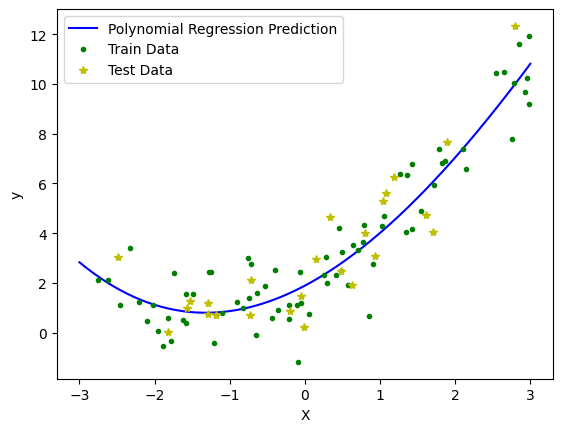

In [23]:
# Prediction of New data

X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

y_new = regression_2.predict(X_new_poly)
plt.plot(X_new, y_new, "b-", label="Polynomial Regression Prediction")
plt.plot(X_train, y_train, "g.", label="Train Data")
plt.plot(X_test, y_test, "y*", label="Test Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## Pipeline Concept

In [ ]:
from sklearn.pipeline import Pipeline

def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    pipeline = Pipeline([("poly_features", poly_features), ("lin_reg", lin_reg)])
    pipeline.fit(X_train, y_train) ## 1. Polynomial Features and then putting it in leaner Regressaion
    y_new_pred = pipeline.predict(X_new)

    # Plotting prediction line

    plt.plot(X_new, y_new_pred, "b-", label=f"Polynomial Regression (degree={degree})")
    plt.plot(X_train, y_train, "g.", label="Train Data")
    plt.plot(X_test, y_test, "y*", label="Test Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title(f"Polynomial Regression with degree {degree}")
    plt.show()

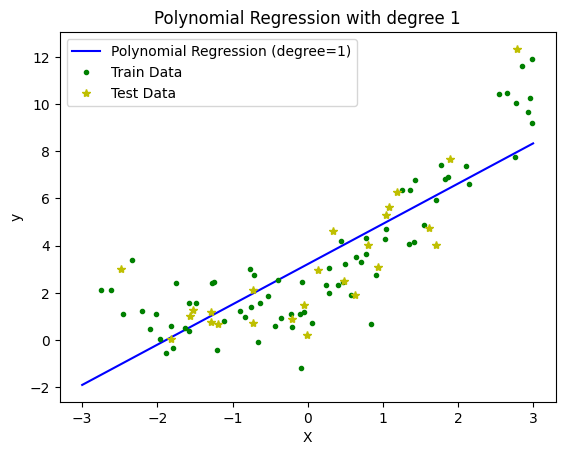

In [25]:
poly_regression(1)

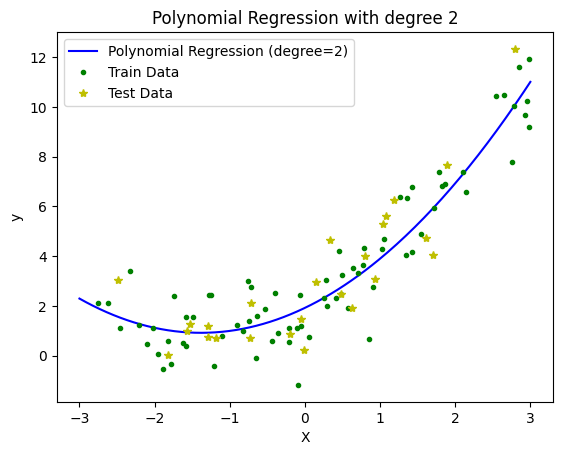

In [26]:
poly_regression(2)

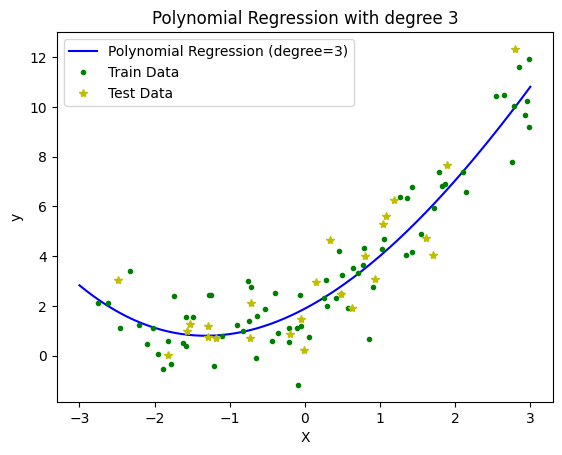

In [27]:
poly_regression(3)

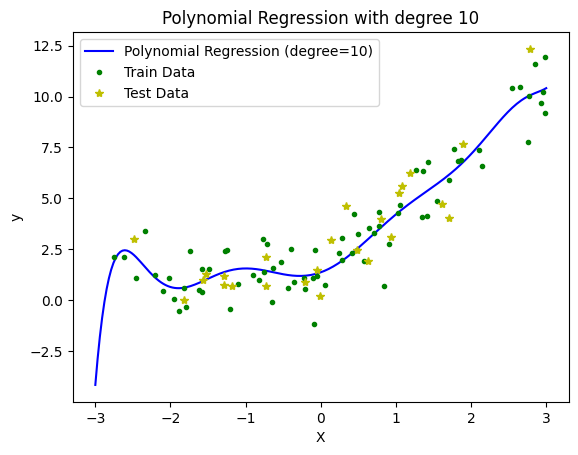

In [28]:
poly_regression(10)

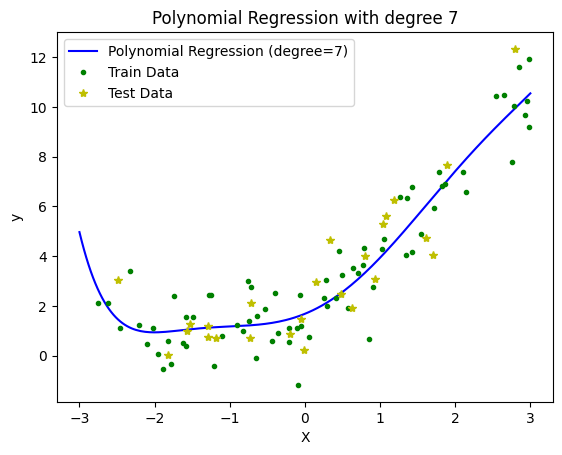

In [30]:
poly_regression(7)